In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [5]:
# Cấu hình các thông số
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 10

In [6]:
# Tạo Image Data Generator với augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Load training data
train_generator = datagen.flow_from_directory(
    'Dataset',  # thư mục chứa các folder co_trung_jpg và khong_trung_jpg
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    classes=['khong_trung_jpg', 'co_trung_jpg']
)

# Load validation data
validation_generator = datagen.flow_from_directory(
    'Dataset',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    classes=['khong_trung_jpg', 'co_trung_jpg']
)

Found 297 images belonging to 2 classes.
Found 73 images belonging to 2 classes.


In [7]:
# Tạo base model từ MobileNetV2
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)
base_model.trainable = False

# Thêm các layer mới
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Tạo model cuối cùng
model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Hiển thị cấu trúc model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [8]:
# Training
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

c:\Users\vuduy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8607 - loss: 0.3188

c:\Users\vuduy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.8669 - loss: 0.3082 - val_accuracy: 1.0000 - val_loss: 0.0467
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.9800 - loss: 0.0871 - val_accuracy: 0.9726 - val_loss: 0.0475
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.9773 - loss: 0.0528 - val_accuracy: 0.9863 - val_loss: 0.0344
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.9955 - loss: 0.0349 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.9815 - loss: 0.0816 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.9987 - loss: 0.0124 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.9855 - loss: 0.0315 - val_accuracy: 1.0000 - val_loss: 0.0024


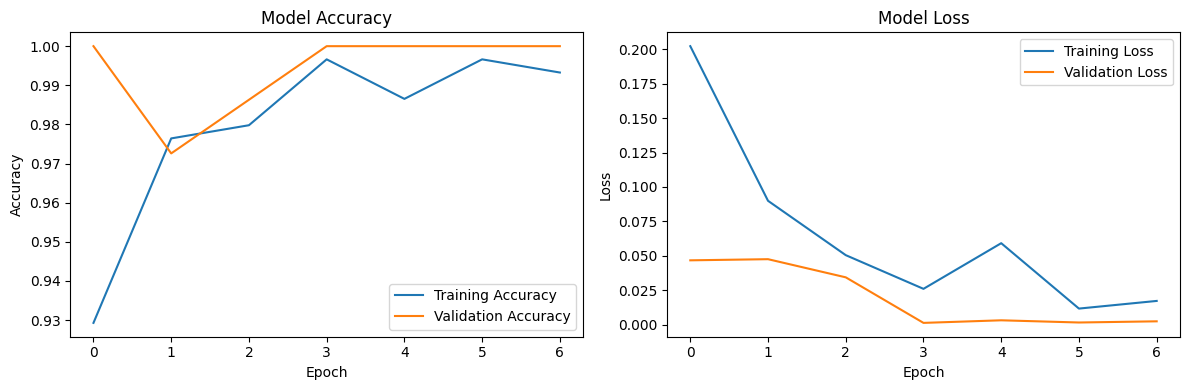

In [9]:
# Vẽ đồ thị kết quả training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
# Lưu model
model.save('egg_detection_model.h5')
print("Model đã được lưu thành công!")

Model đã được lưu thành công!


In [26]:
import cv2
import numpy as np
import os
from tensorflow.keras.models import load_model

# Định nghĩa IMG_SIZE
IMG_SIZE = 224

# Load model
model = load_model('egg_detection_model.h5')

In [27]:
def test_single_image(image_path):
    # Đọc và xử lý ảnh
    img = cv2.imread(image_path)
    if img is None:
        print(f"Không thể đọc file ảnh: {image_path}")
        return
        
    # Tiền xử lý ảnh
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    
    # Dự đoán
    pred = model.predict(img)[0]
    
    # Xử lý kết quả
    result = "Có trứng" if pred > 0.5 else "Không có trứng"
    conf = float(pred) if pred > 0.5 else float(1 - pred)
    
    print(f"Kết quả: {result} (độ tin cậy: {conf:.2f})")

In [31]:
# Test ảnh
img_path = './test4.jpg'

if os.path.exists(img_path):
    test_single_image(img_path)
else:
    print(f"Không tìm thấy file ảnh tại: {img_path}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Kết quả: Không có trứng (độ tin cậy: 0.55)


C:\Users\vuduy\AppData\Local\Temp\ipykernel_25508\3866152462.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  conf = float(pred) if pred > 0.5 else float(1 - pred)
